# Data loading & EDA

# Seismic Event Classification (Low-Magnitude, M1–4)

**Reproducibility note (GitHub version):**
- This notebook expects a CSV file at: `data/raw/usgs_m1_4_aug-nov_2025.csv`
- Raw data is not committed to GitHub. See `data/README.md` for how to recreate/download it.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ------------------------
# Data loading (portable)
# ------------------------
DATA_PATH = Path("data/raw/usgs_m1_4_aug-nov_2025.csv")

if not DATA_PATH.exists():
    raise FileNotFoundError(
        f"Dataset not found at {DATA_PATH.resolve()}\n"
        "Place the CSV at data/raw/ or update DATA_PATH. "
        "See data/README.md for how to reproduce the dataset."
    )

df = pd.read_csv(DATA_PATH)
df.head()


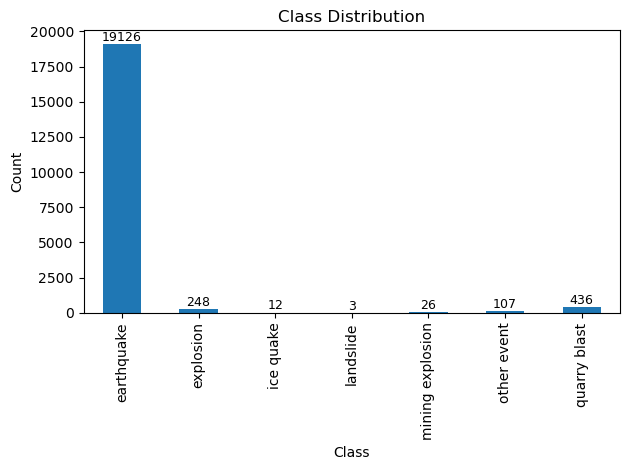

In [2]:
counts = df["type"].value_counts().sort_index()

ax = counts.plot(kind="bar")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Class Distribution")
# adding labels
for i, value in enumerate(counts):
    ax.text(i, value + 5, str(value), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

In [3]:
# Inspect the loaded data characteristics
print("Data shape:  ", df.shape)
df.head(5)

Data shape:   (19958, 22)


time   latitude   longitude  depth   mag magType   nst  \
0  2025-11-19T23:53:04.520Z  49.327333 -120.489667  -0.37  2.07      ml   5.0   
1  2025-11-19T23:47:16.640Z  35.849000 -117.669000   4.07  1.29      ml  22.0   
2  2025-11-19T23:36:54.350Z  19.653000  -67.789600  12.00  3.78      md  20.0   
3  2025-11-19T23:30:24.190Z  37.642167 -119.381833  16.72  1.59      md  27.0   
4  2025-11-19T23:09:59.810Z  34.988000 -118.188000  -0.91  1.42      ml  28.0   

     gap    dmin   rms  ...                   updated  \
0  174.0  0.5655  0.14  ...  2025-11-26T00:23:21.270Z   
1   48.0  0.0669  0.15  ...  2025-11-20T01:09:30.539Z   
2  214.0  1.2836  0.56  ...  2025-11-20T00:05:40.791Z   
3   71.0  0.1603  0.12  ...  2025-11-30T00:24:54.296Z   
4   52.0  0.1139  0.17  ...  2025-11-24T23:56:57.378Z   

                                          place          type horizontalError  \
0                  14 km S of Princeton, Canada     explosion            1.04   
1                  24 km ESE of Little Lake, CA    earthquake            0.19   
2  135 km NNE of Punta Cana, Dominican Republic    earthquake            2.36   
3              20 km ESE of Yosemite Valley, CA    earthquake            0.44   
4                          7 km S of Mojave, CA  quarry blast            0.25   

  depthError  magError  magNst    status  locationSource magSource  
0      31.61  0.075974     3.0  reviewed              uw        uw  
1       0.43  0.161136    18.0  reviewed              ci        ci  
2       3.82  0.150000    12.0  reviewed              pr        pr  
3       1.21  0.434000    17.0  reviewed              nc        nc  
4      31.61  0.101197    34.0  reviewed              ci        ci  

[5 rows x 22 columns]

In [4]:
# Inspection data types and non-null counts of each column

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19958 entries, 0 to 19957
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             19958 non-null  object 
 1   latitude         19958 non-null  float64
 2   longitude        19958 non-null  float64
 3   depth            19958 non-null  float64
 4   mag              19958 non-null  float64
 5   magType          19958 non-null  object 
 6   nst              14978 non-null  float64
 7   gap              14976 non-null  float64
 8   dmin             14975 non-null  float64
 9   rms              19956 non-null  float64
 10  net              19958 non-null  object 
 11  id               19958 non-null  object 
 12  updated          19958 non-null  object 
 13  place            19958 non-null  object 
 14  type             19958 non-null  object 
 15  horizontalError  13327 non-null  float64
 16  depthError       19952 non-null  float64
 17  magError    

In [5]:

# finding quick stats for numeric columns
df.describe()


latitude     longitude         depth           mag           nst  \
count  19958.000000  19958.000000  19958.000000  19958.000000  14978.000000   
mean      42.249450   -121.340330     18.647480      1.749506     27.686807   
std       13.208352     41.674443     32.402746      0.627793     20.527991   
min      -43.637200   -179.983500     -3.500000      1.000000      0.000000   
25%       33.373708   -149.888775      4.614300      1.300000     14.000000   
50%       38.792583   -121.120583      7.915250      1.600000     22.000000   
75%       54.495350   -104.539500     16.367501      2.000000     36.000000   
max       71.795200    179.988900    648.384000      4.000000    215.000000   

                gap          dmin           rms  horizontalError  \
count  14976.000000  14975.000000  19956.000000     13327.000000   
mean     101.183841      0.174364      0.295117         1.064928   
std       66.309589      0.395258      0.263635         2.072059   
min       11.000000      0.000000      0.000000         0.000000   
25%       56.000000      0.016655      0.110000         0.240000   
50%       77.000000      0.067170      0.200000         0.417991   
75%      128.000000      0.150285      0.420000         0.831897   
max      360.000000      7.780000      4.059253        34.090000   

         depthError      magError        magNst  
count  19952.000000  14916.000000  14950.000000  
mean       2.524029      0.176802     20.077659  
std       13.793814      0.097528     22.453575  
min        0.000000      0.000000      0.000000  
25%        0.410000      0.106000      8.000000  
50%        0.684563      0.168000     16.000000  
75%        1.500000      0.210000     25.000000  
max     1391.800000      1.450000    444.000000

In [6]:

# finding quick stats for non-numeric columns
df[df.columns[df.dtypes == "object"]].describe(include="all")


time magType    net          id  \
count                      19958   19958  19958       19958   
unique                     19956       8     15       19958   
top     2025-11-13T05:36:12.167Z      ml     ak  uw62214271   
freq                           2   15325   5207           1   

                         updated                      place        type  \
count                      19958                      19958       19958   
unique                     18891                      10715           7   
top     2025-10-17T22:51:42.040Z  15 km NE of Milford, Utah  earthquake   
freq                         229                        140       19126   

          status locationSource magSource  
count      19958          19958     19958  
unique         2             15        16  
top     reviewed             ak        ak  
freq       14862           5207      5210

In [7]:
df.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                4980
gap                4982
dmin               4983
rms                   2
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    6631
depthError            6
magError           5042
magNst             5008
status                0
locationSource        0
magSource             0
dtype: int64

# Data Wrangling & feature engineering:
**According to the EDA implemented earlier, we have the following problems in our data:**

1. Fields to drop:
   * **[updated]** field shouldn't be included in any model classifying the events as it reflects the latency in the manual interpretation of the data
   * **[id]** field defines the user who inspected the data and is **unique for every record**, so it is not related to the type of the non-earthquake event
   * **[status]** field defines if the data is manually checked and our target is to deal with seismic event characteristics; it is not related to our objective and may snoop the data
   *  Some fields are redundant or closely related to each other **[net, locationSource, & magSource]** fields have the same data, so we will keep only one feature **[net]**.
     

2. Incorrect field type assigned to **[time]**, this will be converted to the correct type and subdivided into multiple fields **[year, month, day, hour]**
3. **[place]** field is a compact descriptive field that needs to be subdivided into multiple fields **[distance_to_city, nearest_city, state]**

4.  High number of null values (+33% of the values) in **[nst, gap, dmin, horizontalError, magError, magNst]** fields

In [8]:
# drop fields 
dropped_fields = ["locationSource","magSource","updated", "id", "status"]
df.drop(dropped_fields, axis =1, inplace = True) 

In [9]:
# inspect correct field dropping
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'place', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst'],
      dtype='object')

In [10]:
# time field correction
df["time"] = pd.to_datetime(df["time"])
# ensure correct field type correction
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19958 entries, 0 to 19957
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             19958 non-null  datetime64[ns, UTC]
 1   latitude         19958 non-null  float64            
 2   longitude        19958 non-null  float64            
 3   depth            19958 non-null  float64            
 4   mag              19958 non-null  float64            
 5   magType          19958 non-null  object             
 6   nst              14978 non-null  float64            
 7   gap              14976 non-null  float64            
 8   dmin             14975 non-null  float64            
 9   rms              19956 non-null  float64            
 10  net              19958 non-null  object             
 11  place            19958 non-null  object             
 12  type             19958 non-null  object             
 13  horizontalError 

In [11]:
# Extract time elements (year, month, day, weekday, hour) into features
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["weekday"] = df["time"].dt.day_name()
df["hour"] = df["time"].dt.hour
df.head()

time   latitude   longitude  depth   mag  \
0 2025-11-19 23:53:04.520000+00:00  49.327333 -120.489667  -0.37  2.07   
1 2025-11-19 23:47:16.640000+00:00  35.849000 -117.669000   4.07  1.29   
2 2025-11-19 23:36:54.350000+00:00  19.653000  -67.789600  12.00  3.78   
3 2025-11-19 23:30:24.190000+00:00  37.642167 -119.381833  16.72  1.59   
4 2025-11-19 23:09:59.810000+00:00  34.988000 -118.188000  -0.91  1.42   

  magType   nst    gap    dmin   rms  ...          type horizontalError  \
0      ml   5.0  174.0  0.5655  0.14  ...     explosion            1.04   
1      ml  22.0   48.0  0.0669  0.15  ...    earthquake            0.19   
2      md  20.0  214.0  1.2836  0.56  ...    earthquake            2.36   
3      md  27.0   71.0  0.1603  0.12  ...    earthquake            0.44   
4      ml  28.0   52.0  0.1139  0.17  ...  quarry blast            0.25   

  depthError  magError  magNst  year  month  day    weekday  hour  
0      31.61  0.075974     3.0  2025     11   19  Wednesday    23  
1       0.43  0.161136    18.0  2025     11   19  Wednesday    23  
2       3.82  0.150000    12.0  2025     11   19  Wednesday    23  
3       1.21  0.434000    17.0  2025     11   19  Wednesday    23  
4      31.61  0.101197    34.0  2025     11   19  Wednesday    23  

[5 rows x 22 columns]

Performing visual inspection of our coverted fields (year): our data is collected during 2025 year so, it will not add prediction cability

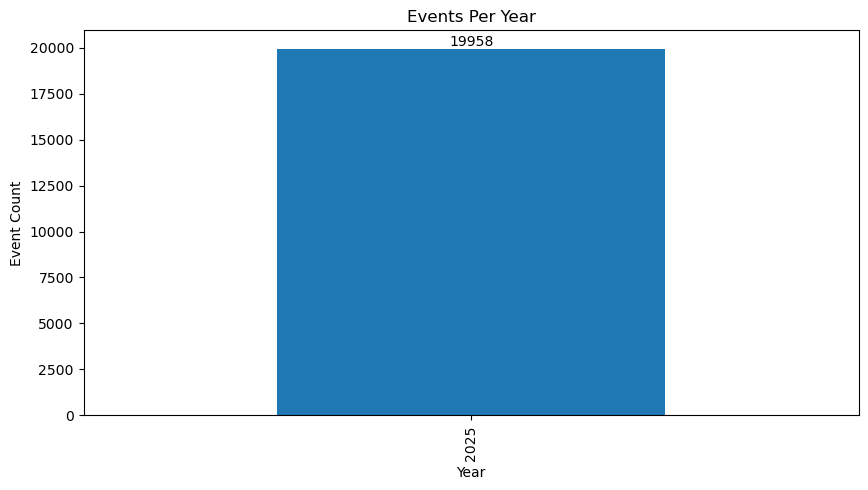

In [12]:
# Events per year
plt.figure(figsize=(10,5))
df["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Events Per Year")
plt.xlabel("Year")
plt.ylabel("Event Count")
for year, events_count in enumerate(df["year"].value_counts().sort_index()):
    plt.text(year, events_count + 5, str(events_count), ha="center", va="bottom", fontsize=10)


plt.show()

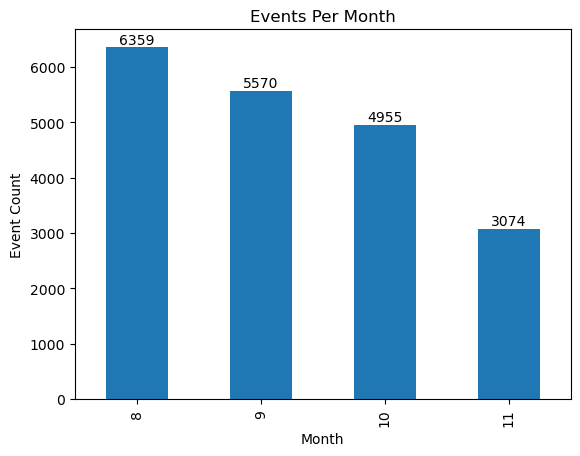

In [13]:
# Events per month
plt.figure()
df["month"].value_counts().sort_index().plot(kind="bar")
plt.title("Events Per Month")
plt.xlabel("Month")
plt.ylabel("Event Count")
for month, events_count in enumerate(df["month"].value_counts().sort_index()):
    plt.text(month, events_count + 5, str(events_count), ha="center", va="bottom", fontsize=10)
plt.show()

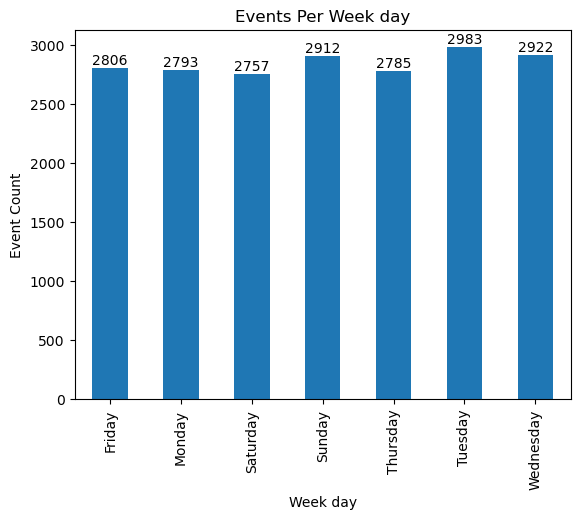

In [14]:
# Events per weekday
plt.figure()
df["weekday"].value_counts().sort_index().plot(kind="bar")
plt.title("Events Per Week day")
plt.xlabel("Week day")
plt.ylabel("Event Count")
for weekday, events_count in enumerate(df["weekday"].value_counts().sort_index()):
    plt.text(weekday, events_count + 5, str(events_count), ha="center", va="bottom", fontsize=10)
plt.show()

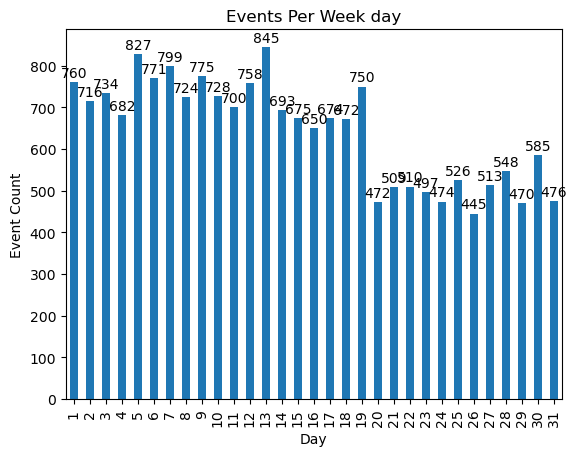

In [15]:
# Events per day
plt.figure()
df["day"].value_counts().sort_index().plot(kind="bar")
plt.title("Events Per Week day")
plt.xlabel("Day")
plt.ylabel("Event Count")
for day, events_count in enumerate(df["day"].value_counts().sort_index()):
    plt.text(day, events_count + 5, str(events_count), ha="center", va="bottom", fontsize=10)


plt.show()

Subdivide the place column into distance (km), nearest city, and state.
Handles formats like:
*   "5 km W of Yacolt, Washington"
*   "44 km S of Sandy Valley, Nevada"
*   "14 km S of Princeton, Canada"
*   "2 km ENE of Some City, CA"
*   "Princeton, Canada"
*   "Sandy Valley, Nevada"

In [16]:
df = df[df['place'].str.contains(r'\d+\s*km.*?of', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19848 entries, 0 to 19957
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             19848 non-null  datetime64[ns, UTC]
 1   latitude         19848 non-null  float64            
 2   longitude        19848 non-null  float64            
 3   depth            19848 non-null  float64            
 4   mag              19848 non-null  float64            
 5   magType          19848 non-null  object             
 6   nst              14893 non-null  float64            
 7   gap              14891 non-null  float64            
 8   dmin             14890 non-null  float64            
 9   rms              19846 non-null  float64            
 10  net              19848 non-null  object             
 11  place            19848 non-null  object             
 12  type             19848 non-null  object             
 13  horizontalError  1324

In [17]:
df[["distance_to_city", "state"]] = df["place"].str.extract(r"(\d+(?:\.\d+)?)\s*km.*?,\s*(.*)")



In [18]:
df[["distance_to_city", "state"]].head()

distance_to_city               state
0               14              Canada
1               24                  CA
2              135  Dominican Republic
3               20                  CA
4                7                  CA

In [19]:
# dropping unnecessary fields
df.reset_index(drop=True)
df.drop(["time", "place", "year"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19848 entries, 0 to 19957
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          19848 non-null  float64
 1   longitude         19848 non-null  float64
 2   depth             19848 non-null  float64
 3   mag               19848 non-null  float64
 4   magType           19848 non-null  object 
 5   nst               14893 non-null  float64
 6   gap               14891 non-null  float64
 7   dmin              14890 non-null  float64
 8   rms               19846 non-null  float64
 9   net               19848 non-null  object 
 10  type              19848 non-null  object 
 11  horizontalError   13242 non-null  float64
 12  depthError        19842 non-null  float64
 13  magError          14831 non-null  float64
 14  magNst            14865 non-null  float64
 15  month             19848 non-null  int32  
 16  day               19848 non-null  int32  
 17

In [20]:
# fixing distance to city data type
# incosistent values become NaN via errors="coerce"
df["distance_to_city"] = pd.to_numeric(df["distance_to_city"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19848 entries, 0 to 19957
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          19848 non-null  float64
 1   longitude         19848 non-null  float64
 2   depth             19848 non-null  float64
 3   mag               19848 non-null  float64
 4   magType           19848 non-null  object 
 5   nst               14893 non-null  float64
 6   gap               14891 non-null  float64
 7   dmin              14890 non-null  float64
 8   rms               19846 non-null  float64
 9   net               19848 non-null  object 
 10  type              19848 non-null  object 
 11  horizontalError   13242 non-null  float64
 12  depthError        19842 non-null  float64
 13  magError          14831 non-null  float64
 14  magNst            14865 non-null  float64
 15  month             19848 non-null  int32  
 16  day               19848 non-null  int32  
 17

In [21]:
df['state'].value_counts()

state
Alaska                    6090
CA                        5269
Texas                     2168
Oklahoma                   820
New Mexico                 788
                          ... 
Portugal                     1
Maryland                     1
Bosnia and Herzegovina       1
United Kingdom               1
Haiti                        1
Name: count, Length: 80, dtype: int64

In [22]:
# removing any country/state that appeared only once, as it will overfit any model

# Strip whitespace just in case
df["state"] = df["state"].astype(str).str.strip()

# define countries outliers
countries_outliers = df["state"].value_counts()[df["state"].value_counts()<2].index

df = df[~df["state"].isin(countries_outliers)].reset_index(drop=True)
df["state"].value_counts()[df["state"].value_counts()>2]

state
Alaska                 6090
CA                     5269
Texas                  2168
Oklahoma                820
New Mexico              788
Nevada                  765
Hawaii                  675
Puerto Rico             474
Utah                    400
Washington              382
Montana                 316
Idaho                   282
Oregon                  182
Wyoming                 173
Canada                  122
Colorado                117
B.C., MX                110
U.S. Virgin Islands      87
California               87
Russia                   81
Dominican Republic       69
Tennessee                48
Missouri                 43
Arkansas                 34
South Carolina           23
Kansas                   23
Mexico                   20
Arizona                  20
North Carolina           16
Indonesia                12
Maine                    12
New York                 11
Chile                    10
Papua New Guinea          8
Guam                      7
Afghanistan   

In [23]:
# for data quality purposes, keep all states to follow the same naming convention 
state_mapping = {"CA": "California", "NV": "Nevada"}

df['state'] = df['state'].replace(state_mapping)
df["state"].value_counts()

state
Alaska                      6090
California                  5356
Texas                       2168
Oklahoma                     820
New Mexico                   788
Nevada                       770
Hawaii                       675
Puerto Rico                  474
Utah                         400
Washington                   382
Montana                      316
Idaho                        282
Oregon                       182
Wyoming                      173
Canada                       122
Colorado                     117
B.C., MX                     110
U.S. Virgin Islands           87
Russia                        81
Dominican Republic            69
Tennessee                     48
Missouri                      43
Arkansas                      34
South Carolina                23
Kansas                        23
Mexico                        20
Arizona                       20
North Carolina                16
Maine                         12
Indonesia                     12
New 

preserving states with small frequency will lead to produce unecssary high dimensions when implementing one-hot-encoding. This sparse data acts as noise will cause model to overfit to this noise.
As work around is to group these into bigger category (**"other state"**), this step will help reduce state imbalance and improve model generalisationion

In [24]:
# Get state value counts
state_counts = df["state"].value_counts()

# Identify states with count < 10
low_freq_states = state_counts[state_counts < 10].index

# Replace them with "Other States"
df["state_grouped"] = df["state"].replace(low_freq_states, "Other States")
df.drop(["state"], axis =1, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19830 entries, 0 to 19829
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          19830 non-null  float64
 1   longitude         19830 non-null  float64
 2   depth             19830 non-null  float64
 3   mag               19830 non-null  float64
 4   magType           19830 non-null  object 
 5   nst               14875 non-null  float64
 6   gap               14873 non-null  float64
 7   dmin              14872 non-null  float64
 8   rms               19828 non-null  float64
 9   net               19830 non-null  object 
 10  type              19830 non-null  object 
 11  horizontalError   13224 non-null  float64
 12  depthError        19824 non-null  float64
 13  magError          14813 non-null  float64
 14  magNst            14847 non-null  float64
 15  month             19830 non-null  int32  
 16  day               19830 non-null  int32 

In [25]:
df["state_grouped"].value_counts()

state_grouped
Alaska                 6090
California             5356
Texas                  2168
Oklahoma                820
New Mexico              788
Nevada                  770
Hawaii                  675
Puerto Rico             474
Utah                    400
Washington              382
Montana                 316
Idaho                   282
Oregon                  182
Wyoming                 173
Canada                  122
Colorado                117
B.C., MX                110
Other States             96
U.S. Virgin Islands      87
Russia                   81
Dominican Republic       69
Tennessee                48
Missouri                 43
Arkansas                 34
Kansas                   23
South Carolina           23
Arizona                  20
Mexico                   20
North Carolina           16
Maine                    12
Indonesia                12
New York                 11
Chile                    10
Name: count, dtype: int64

### inspecting object fields 
* type

In [26]:
df["type"].value_counts()

type
earthquake          18999
quarry blast          436
explosion             248
other event           107
mining explosion       25
ice quake              12
landslide               3
Name: count, dtype: int64

### inspecting object fields 
* net

In [27]:
df["net"].value_counts()

net
ak    5181
nc    3106
tx    2933
ci    2278
us    1150
nn     832
ok     819
hv     672
uu     665
pr     619
uw     604
mb     437
av     363
nm      97
se      74
Name: count, dtype: int64

### Handling null values

To know what is the right action that should be taken to fix the nulls we need to find the distribution of the nulls vs the event types

In [28]:
# defining fields with nulls
df.isna().sum()

latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 4955
gap                 4957
dmin                4958
rms                    2
net                    0
type                   0
horizontalError     6606
depthError             6
magError            5017
magNst              4983
month                  0
day                    0
weekday                0
hour                   0
distance_to_city       0
state_grouped          0
dtype: int64

1. nst: **4955** null values
    * The field function: This is the number of seismic stations that contributed picks (P/S wave arrivals) to locate the event.

    * What is the meaning of nulls: This can be interpreted primarily as manual interpretation/recoding of the data
    * Actions to fix nulls' of this field: **Replace with 1**

2. gap: **4957** null values
    * The field function: this field records the largest angle (in degrees) between stations used in locating the event. A smaller gap means better location quality, while larger gap poorer location quality.
    * What is the meaning of nulls: This can be due to manual insertion of the event into the catalogue, which means no near station recorded the event
    * Actions to fix nulls of this field: **replace nulls with the median of this field** median used here to avoid any skewness in the data

3. dmin                **4958** null values
    * The field function: defines the distance from the event's location to the nearest station
    * What is the meaning of nulls: This can be due to manual insertion of metadata or very low quality of event's location geometery
    * Actions to fix nulls' of this field:  **replace nulls with the median of this field** median used here to avoid any skewness in the data
4. rms                    **3** null values
    * The field function: Root-mean-square of travel-time residual is a metric to express how well the seismic arrivals match the computed earthquake location.
    * What is the meaning of nulls: no residual time was calculated 
    * Actions to fix nulls' of this field: **few number only 2 records (dropping values will not affect)**


5. horizontalError     **6606** null values

    * The field function: defines the uncertainty in the horizontal location of the event
    * What is the meaning of nulls: This can be due to manual insertion of metadata or very low quality of event's location geometery
    * Actions to fix nulls' of this field:  **replace nulls with the median of this field** median used here to avoid any skewness in the data




6. depthError             **6** null values
    * The field function: defines the uncertainty in the depth calculation
    * What is the meaning of nulls: uncertainty is not calculated  for manual entries 
    * Actions to fix nulls' of this field:  **few number only 2 records (dropping values will not affect)**
7. magError            **5017** null values
    * The field function: defines the uncertainty in the event's magnitude calculation
    * What is the meaning of nulls: uncertainty is not calculated  for manual entries 
    * Actions to fix nulls' of this field:  **repalce with the median of this field**
8. magNst              **4983** null values
    * The field function: Number of stations contributing to magnitude.
    * What is the meaning of nulls: This can be interpreted primarily as manual interpretation/recoding of the data or only one station contribute to the magnitude calculations
    * Actions to fix nulls' of this field: **Replace with 1**


In [29]:
# defining fields with nulls
fields_null = df.isna().sum()[df.isna().sum()>0].index.tolist()
fields_null

['nst',
 'gap',
 'dmin',
 'rms',
 'horizontalError',
 'depthError',
 'magError',
 'magNst']

In [30]:
print(df["type"].value_counts())

# replace nulls in nst with 1
df["nst"] = df["nst"].fillna(1)

# replace nulls in magNst with 1
df["magNst"] = df["magNst"].fillna(1)


# drop rows with nulls in rms
df = df[df["rms"].notna()]

# drop rows with nulls in depthError
df = df[df["depthError"].notna()]

# Reset index after dropping rows
df = df.reset_index(drop=True) 



# handling nulls in gap, dmin, horizontalError, magError by replacing nulls with the median of each field
nulls_col= ["gap", "dmin", "horizontalError", "magError"]#, "rms", "depthError"]

for col in nulls_col:
    # Compute median per event type
    col_median = df[col].median()
    # Fill nulls with the corresponding median
    df[col] = df[col].fillna(col_median)
    print(f"{col} nulls handled {col_median}")


# check of remaining nulls
print(df.isna().sum())
print(df["type"].value_counts())



type
earthquake          18999
quarry blast          436
explosion             248
other event           107
mining explosion       25
ice quake              12
landslide               3
Name: count, dtype: int64
gap nulls handled 77.0
dmin nulls handled 0.06652
horizontalError nulls handled 0.41
magError nulls handled 0.1686162265
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                 0
gap                 0
dmin                0
rms                 0
net                 0
type                0
horizontalError     0
depthError          0
magError            0
magNst              0
month               0
day                 0
weekday             0
hour                0
distance_to_city    0
state_grouped       0
dtype: int64
type
earthquake          18994
quarry blast          436
explosion             248
other event           106
mining explosion       25
ice quake              12
landslide               3
Name

**The ladslide data is too small for ML techniques & any imbalance handling or oversampling reuqire + 6 samples per label so we will merge it other dther event**

In [31]:

"""
Null During Train test split error ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.
raised due to too small taget count of landslide
"""

"""Solution: merge it with other events"""

'Solution: merge it with other events'

In [32]:
df["type"] = df["type"].replace({"landslide": "other event"})
print(df["type"].value_counts())

type
earthquake          18994
quarry blast          436
explosion             248
other event           109
mining explosion       25
ice quake              12
Name: count, dtype: int64


In [33]:
# Select numeric columns and add the target/class column
pair_plot_df = df.select_dtypes(include=['int', 'float']).columns.tolist()+["type"]


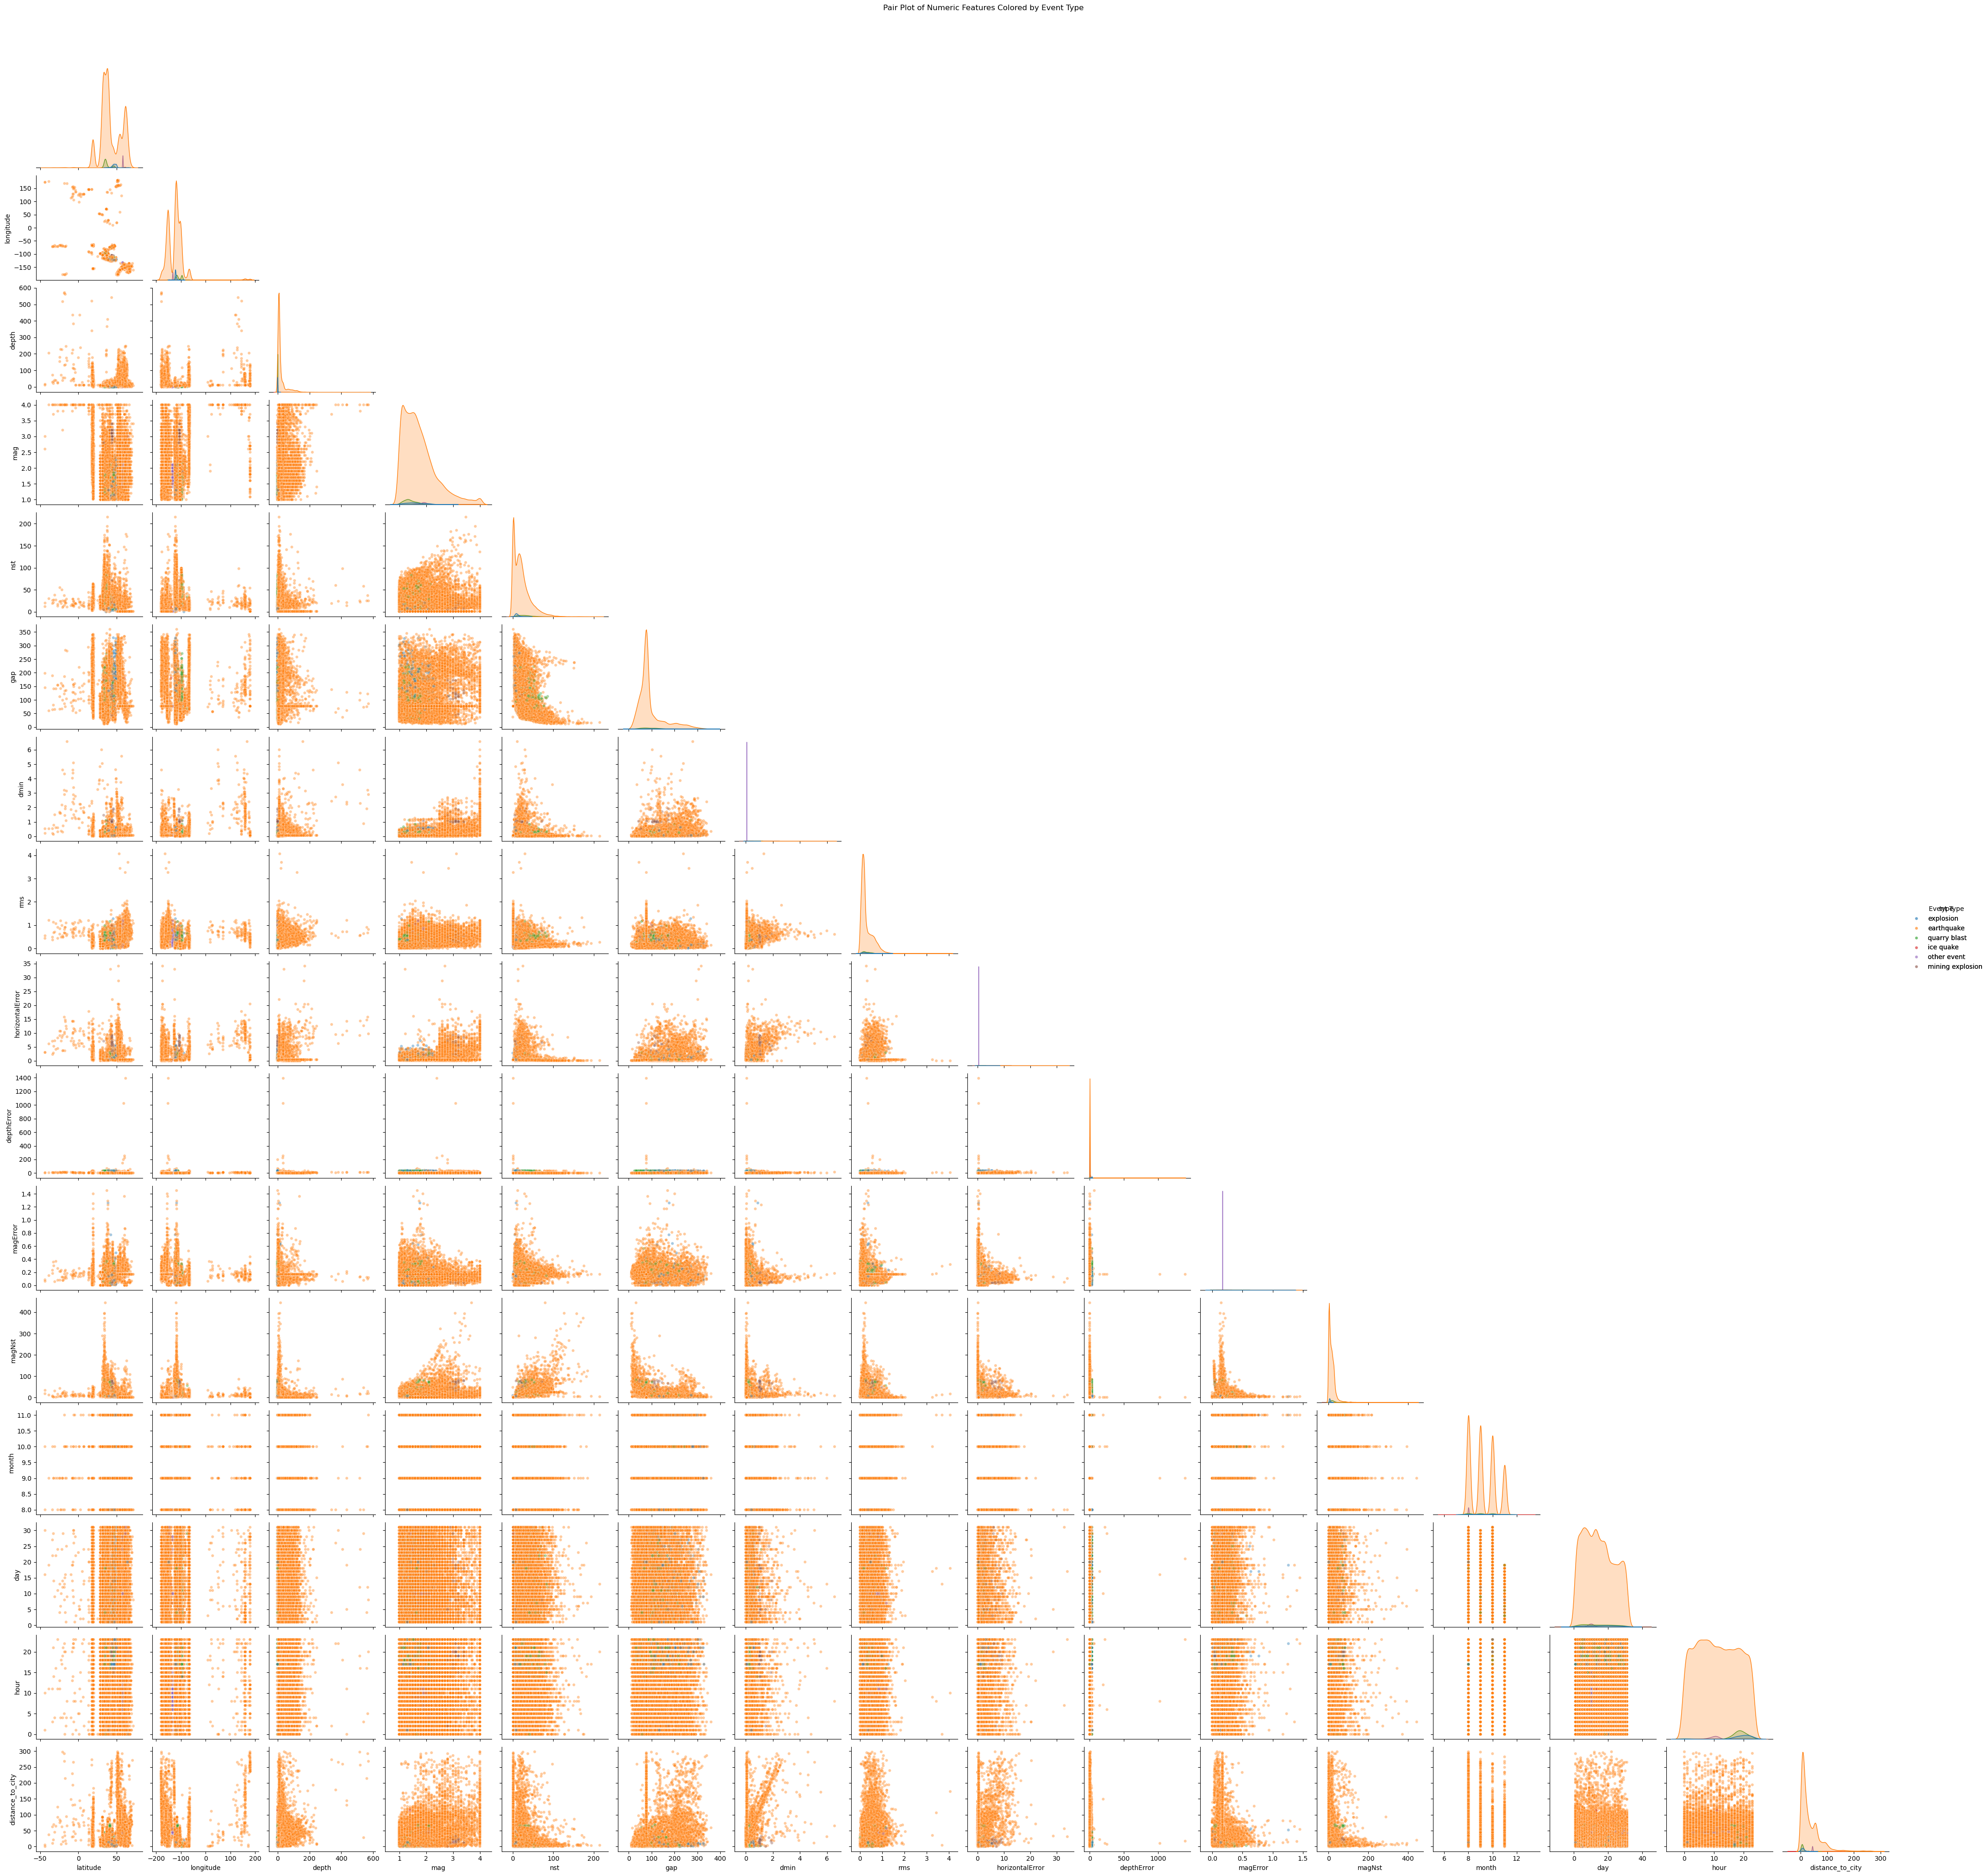

In [84]:
import os
os.makedirs('results', exist_ok=True)

# Select numeric columns and add the target/class column
pair_plot_df = df.select_dtypes(include=["int", "float"]).columns.tolist()+["type"]

# Create the pairplot colored by event type
pairplot = sns.pairplot(df[pair_plot_df], hue="type", diag_kind="kde", corner=True, plot_kws={'alpha': 0.4, 's': 20})

pairplot.fig.suptitle("Pair Plot of Numeric Features Colored by Event Type", y=1.02)
pairplot.add_legend(title="Event Type")

# To better explore the figure, I will export it
pairplot.savefig("results/pairplot.png",dpi=300, bbox_inches="tight")
plt.show()

# ML common tasks

## Environment / dependencies

Install dependencies from `requirements.txt`:

```bash
pip install -r requirements.txt
```

(Notebook cell-based `pip install ...` commands were removed for GitHub cleanliness and reproducibility.)


In [36]:
df["type"].value_counts()

type
earthquake          18994
quarry blast          436
explosion             248
other event           109
mining explosion       25
ice quake              12
Name: count, dtype: int64

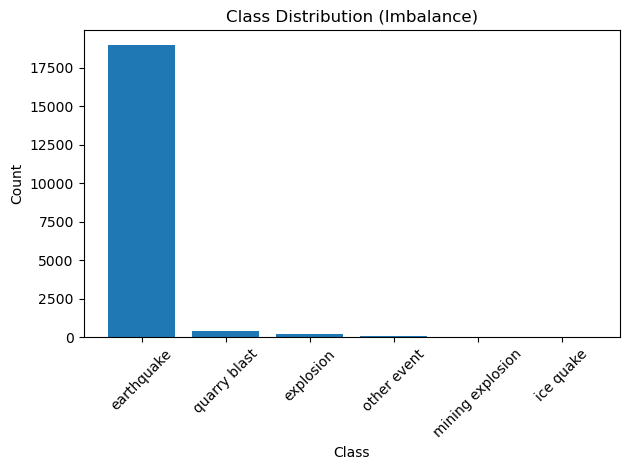

In [37]:
# depicting final class imbalance
class_counts = df["type"].value_counts()

plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:

# Predictor & Target separation

y = df["type"]
X = df.drop(["type"], axis = 1)
X = pd.get_dummies(X, columns=["state_grouped", "net", "weekday", "magType"], drop_first=True)
print("Feature matrix shape:", X.shape)
print("Feature matrix shape:", y.shape)


Feature matrix shape: (19824, 75)
Feature matrix shape: (19824,)


### Train test split
**Please note that:**
* ***stratify*** is used to handle the imbalance issues, where it ensures that the class distribution in y is preserved across all splits.
* Data is split into ***3*** parts as follows:
     * 60% for Training
     * 20% for Validation in the cross-validation process during model hyperparameter fine-tuning to avoid ***data leakage (snooping)***
     * 20% for Testing and final evaluation of the model and standardised model's performance comparisons

In [39]:

# First split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)  

# Second split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
classes = np.unique(y_train)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (11894, 75) Val: (3965, 75) Test: (3965, 75)


### To handle data imbalance, we followed a cost-sensitive approach built within each model
**Please note that:**
* KNN is expected to minimise the data imbalance by using **"distance"** in the **"knn__weights"**
* RF handle imbalance from precalculated weight via **compute_class_weight** and implement them via this paramter **class_weight=class_weight_dict**


# 1. KNN algorithm

In [40]:
# KNN require feature scaling, while our features vary in ranges
# standard scaler is better becuase it is less sensitive to outliers & data skewness compared to MinMaxScaler
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

"""
# Manhattan distance Vs Euclidean distance Vs Squared Euclidean distance
# distance means closer points matter more 
# uniform means all the same
"""
knn_param_grid = {"knn__n_neighbors": [5, 7, 11], "knn__weights": ["uniform", "distance"], "knn__metric": ["euclidean","manhattan","sqeuclidean"]}                           

"""
# building grid search based on f1-weighted as every class contributes proportionally to the final score, 
# which reduces the effect of  dominant sample (earthquake) and give more weight to under represented data
# this is critical for us as we care for all classes
"""
knn_gs = GridSearchCV(estimator=knn_pipeline, param_grid=knn_param_grid, scoring="f1_weighted", cv=3)

In [41]:
# fitting the created knn grid 
knn_gs.fit(X_train, y_train)

print("\nbest KNN parameters:", knn_gs.best_params_)
print("\nbest KNN weighted f1:", knn_gs.best_score_)

best_knn = knn_gs.best_estimator_


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


best KNN parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

best KNN weighted f1: 0.9908437307365038


In [42]:
# confirm that the model is not overfit and prevent data snooping
y_val_pred_knn = best_knn.predict(X_val)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
val_f1_knn = f1_score(y_val, y_val_pred_knn, average="weighted")

print("\nKNN – Validation Set\n")
print("\nValidation Accuracy:", round(val_acc_knn, 6))
print("\nValidation Weighted F1:", round(val_f1_knn, 6))
print("\nValidation Classification Report (KNN):\n")
print(classification_report(y_val, y_val_pred_knn, digits =6))



KNN – Validation Set


Validation Accuracy: 0.990668

Validation Weighted F1: 0.990187

Validation Classification Report (KNN):

                  precision    recall  f1-score   support

      earthquake   0.993701  0.996578  0.995137      3799
       explosion   0.897959  0.897959  0.897959        49
       ice quake   0.000000  0.000000  0.000000         3
mining explosion   1.000000  0.800000  0.888889         5
     other event   0.869565  0.909091  0.888889        22
    quarry blast   0.936709  0.850575  0.891566        87

        accuracy                       0.990668      3965
       macro avg   0.782989  0.742367  0.760407      3965
    weighted avg   0.989834  0.990668  0.990187      3965



C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

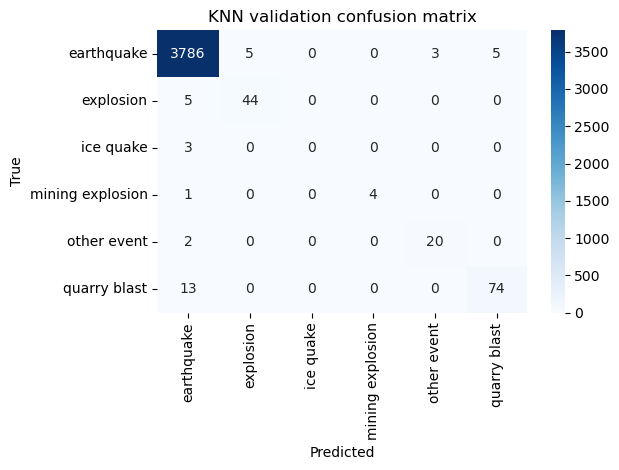

In [43]:
# KNN validata data confusion matrix
cm_val_knn = confusion_matrix(y_val, y_val_pred_knn, labels=classes)
plt.figure()

sns.heatmap(cm_val_knn, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN validation confusion matrix")
plt.tight_layout()
plt.show()

In [44]:
# Train the knn classifier on the whole 80% training and validation sets
X_train_val = pd.concat([X_train, X_val], axis=0)
#y_train_val = np.concatenate([y_train, y_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

best_knn.fit(X_train_val, y_train_val)

y_test_pred_knn = best_knn.predict(X_test)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn, average="weighted")


In [45]:
# getting test score reports
print("\nKNN perfomance on test data")
print("Test accuracy:", round(test_acc_knn, 6))
print("Test weighted f1:", round(test_f1_knn, 6))
print("\nTest Classification Report (KNN):")
print(classification_report(y_test, y_test_pred_knn, digits=6))


KNN perfomance on test data
Test accuracy: 0.993443
Test weighted f1: 0.99317

Test Classification Report (KNN):
                  precision    recall  f1-score   support

      earthquake   0.996318  0.997105  0.996711      3799
       explosion   0.905660  0.960000  0.932039        50
       ice quake   0.000000  0.000000  0.000000         2
mining explosion   0.800000  0.800000  0.800000         5
     other event   1.000000  1.000000  1.000000        22
    quarry blast   0.927711  0.885057  0.905882        87

        accuracy                       0.993443      3965
       macro avg   0.771615  0.773694  0.772439      3965
    weighted avg   0.992939  0.993443  0.993170      3965



C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

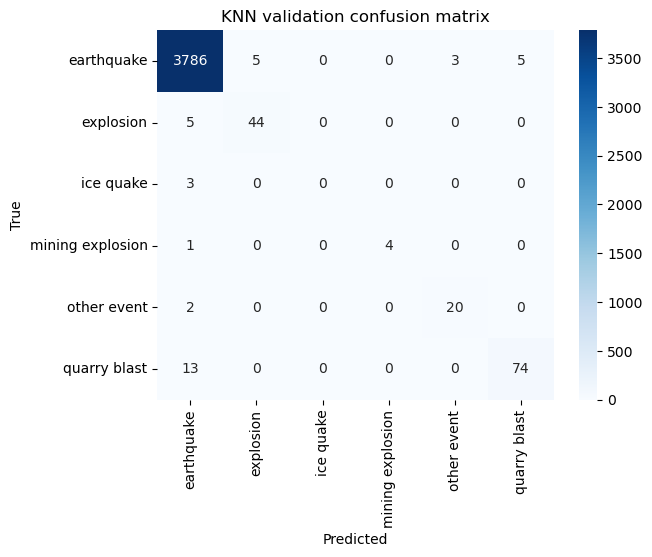

In [46]:
# KNN test data confusion matrix
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn, labels=classes)
plt.figure()

sns.heatmap(cm_val_knn, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN validation confusion matrix")
plt.show()

# 2. Radius based Knn

In [47]:
# majority class used if a sample has no neighbours in the radius
majority_class = y_train.value_counts().idxmax()
print("Majority class (for outlier_label):", majority_class)



Majority class (for outlier_label): earthquake


In [48]:
radius_pipeline = Pipeline([("scaler", StandardScaler()), ("rnn", RadiusNeighborsClassifier(outlier_label=majority_class))])


In [49]:
# epsilon radius values to try 
# distance closer points have more influence
# uniform all contribute the same
radius_param_grid = {"rnn__radius": [0.5, 1.0, 1.5, 5, 10], "rnn__weights": ["uniform", "distance"], 
                     "rnn__metric": ["euclidean","manhattan","sqeuclidean"]}

In [50]:
# building radiusNN grid search cross validator

radius_gs = GridSearchCV(estimator=radius_pipeline, param_grid=radius_param_grid, scoring="f1_weighted", cv=3)

In [51]:

radius_gs.fit(X_train, y_train)

print("\nbst radiusNN parameters:", radius_gs.best_params_)
best_radius_nn = radius_gs.best_estimator_


bst radiusNN parameters: {'rnn__metric': 'sqeuclidean', 'rnn__radius': 5, 'rnn__weights': 'distance'}


In [52]:
# validating the best radius model on the validation data
y_val_pred_rnn = best_radius_nn.predict(X_val)
val_acc_rnn = accuracy_score(y_val, y_val_pred_rnn)
val_f1_rnn = f1_score(y_val, y_val_pred_rnn, average="weighted")

print("\nradius-NN on validation data")
print("validation accuracy:", round(val_acc_rnn, 6))
print("validation wt f1:", round(val_f1_rnn, 6))
print("\nvalidation classification report (radius-NN):")
print(classification_report(y_val, y_val_pred_rnn, digits = 6))



radius-NN on validation data
validation accuracy: 0.98512
validation wt f1: 0.982857

validation classification report (radius-NN):
                  precision    recall  f1-score   support

      earthquake   0.986726  0.997894  0.992278      3799
       explosion   1.000000  0.469388  0.638889        49
       ice quake   0.000000  0.000000  0.000000         3
mining explosion   0.000000  0.000000  0.000000         5
     other event   0.800000  0.909091  0.851064        22
    quarry blast   0.960000  0.827586  0.888889        87

        accuracy                       0.985120      3965
       macro avg   0.624454  0.533993  0.561853      3965
    weighted avg   0.983276  0.985120  0.982857      3965



C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

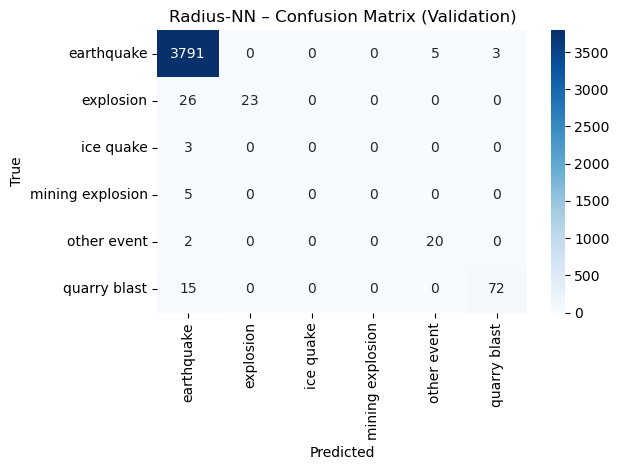

In [53]:
# validation confusion matrix
cm_val_rnn = confusion_matrix(y_val, y_val_pred_rnn, labels=classes)
plt.figure()
sns.heatmap(cm_val_rnn, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Radius-NN – Confusion Matrix (Validation)")
plt.tight_layout()
plt.show()


radiusNN performance on testing subset
tst accuracy: 0.987642
test weighted f1: 0.986322

test classification Report (radiusNN):
                  precision    recall  f1-score   support

      earthquake   0.988790  0.998421  0.993582      3799
       explosion   1.000000  0.640000  0.780488        50
       ice quake   0.000000  0.000000  0.000000         2
mining explosion   1.000000  0.200000  0.333333         5
     other event   0.916667  1.000000  0.956522        22
    quarry blast   0.944444  0.781609  0.855346        87

        accuracy                       0.987642      3965
       macro avg   0.808317  0.603338  0.653212      3965
    weighted avg   0.987074  0.987642  0.986322      3965



C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

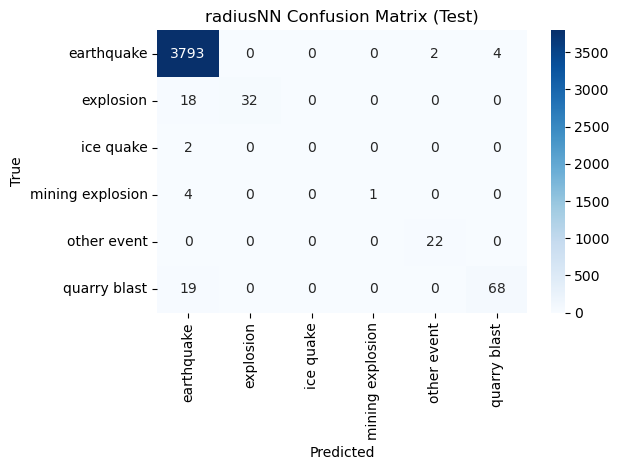

In [54]:

X_train_val = pd.concat([X_train, X_val], axis=0)
#y_train_val = np.concatenate([y_train, y_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)
best_radius_nn.fit(X_train_val, y_train_val)

y_test_pred_rnn = best_radius_nn.predict(X_test)
test_acc_rnn = accuracy_score(y_test, y_test_pred_rnn)
test_f1_rnn = f1_score(y_test, y_test_pred_rnn, average="weighted")

print("\nradiusNN performance on testing subset")
print("tst accuracy:", round(test_acc_rnn, 6))
print("test weighted f1:", round(test_f1_rnn, 6))
print("\ntest classification Report (radiusNN):")
print(classification_report(y_test, y_test_pred_rnn, digits = 6))

# Confusion matrix on test set
cm_test_rnn = confusion_matrix(y_test, y_test_pred_rnn, labels=classes)
plt.figure()
sns.heatmap(cm_test_rnn, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("radiusNN Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 3. LDA

In [55]:
# creation of lda pipline & corss validator
lda_pipeline = Pipeline([("scaler", StandardScaler()), ("lda", LinearDiscriminantAnalysis())])

# LDA solvers to explore

lda_param_grid = {"lda__solver": ["svd", "lsqr", "eigen"]}

# cross validation grid

lda_gs = GridSearchCV(estimator=lda_pipeline, param_grid=lda_param_grid, scoring="f1_weighted", cv=3)


In [56]:

lda_gs.fit(X_train, y_train)

print("\nbest LDA model parameters:", lda_gs.best_params_)
best_lda = lda_gs.best_estimator_


C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\agno3\AppData\Roaming\Python\Python312\site-pack


best LDA model parameters: {'lda__solver': 'svd'}



LDA on validation set

validation accuracy: 0.951576

validation avg weighted F1: 0.956004

validation macro weighted F1: 0.573068

validation classification feport (LDA):

                  precision    recall  f1-score   support

      earthquake       0.98      0.96      0.97      3799
       explosion       0.62      0.57      0.60        49
       ice quake       0.00      0.00      0.00         3
mining explosion       0.56      1.00      0.71         5
     other event       0.57      0.91      0.70        22
    quarry blast       0.36      0.62      0.45        87

        accuracy                           0.95      3965
       macro avg       0.51      0.68      0.57      3965
    weighted avg       0.96      0.95      0.96      3965



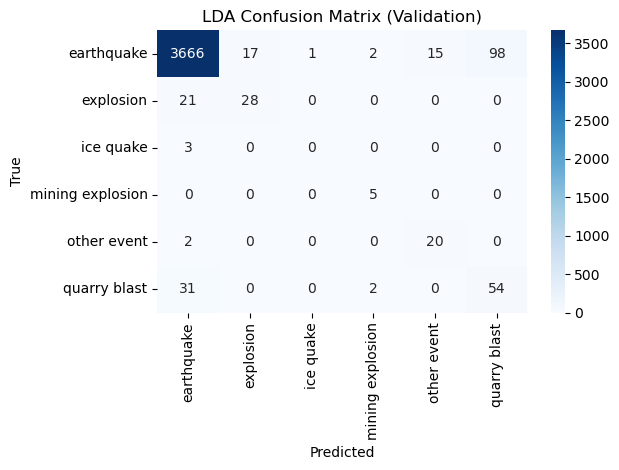

In [57]:
# best LDA model performance validation
y_val_pred_lda = best_lda.predict(X_val)
val_acc_lda = accuracy_score(y_val, y_val_pred_lda)
val_avg_f1_lda = f1_score(y_val, y_val_pred_lda, average="weighted")
val_macro_f1_lda = f1_score(y_val, y_val_pred_lda, average="macro")


print("\nLDA on validation set")
print("\nvalidation accuracy:", round(val_acc_lda, 6))
print("\nvalidation avg weighted F1:", round(val_avg_f1_lda, 6))
print("\nvalidation macro weighted F1:", round(val_macro_f1_lda, 6))
print("\nvalidation classification feport (LDA):\n")
print(classification_report(y_val, y_val_pred_lda))

# Confusion matrix on validation set
cm_val_lda = confusion_matrix(y_val, y_val_pred_lda, labels=classes)
plt.figure()
sns.heatmap(cm_val_lda, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LDA Confusion Matrix (Validation)")
plt.tight_layout()
plt.show()


In [58]:
# best LDA model training on 80% (training + validation)
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

best_lda.fit(X_train_val, y_train_val)

y_test_pred_lda = best_lda.predict(X_test)
test_acc_lda = accuracy_score(y_test, y_test_pred_lda)
test_wt_f1_lda = f1_score(y_test, y_test_pred_lda, average="weighted")
test_macro_f1_lda = f1_score(y_test, y_test_pred_lda, average="macro")
print("\nLDA performance evaluation on testing subset")
print("Test accuracy:", round(test_acc_lda, 6))
print("Test weighted F1:", round(test_wt_f1_lda, 6))
print("Test macro F1:", round(test_macro_f1_lda, 6))
print("\nTest classification report (LDA):")
print(classification_report(y_test, y_test_pred_lda, digits=6))



LDA performance evaluation on testing subset
Test accuracy: 0.941488
Test weighted F1: 0.948729
Test macro F1: 0.515333

Test classification report (LDA):
                  precision    recall  f1-score   support

      earthquake   0.982689  0.956304  0.969317      3799
       explosion   0.681818  0.600000  0.638298        50
       ice quake   0.000000  0.000000  0.000000         2
mining explosion   0.277778  1.000000  0.434783         5
     other event   0.550000  1.000000  0.709677        22
    quarry blast   0.259036  0.494253  0.339921        87

        accuracy                       0.941488      3965
       macro avg   0.458553  0.675093  0.515333      3965
    weighted avg   0.959231  0.941488  0.948729      3965



C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

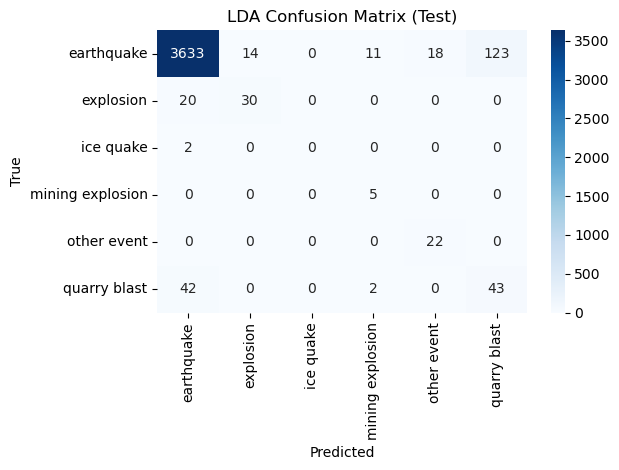

In [59]:
# Confusion matrix on test set
cm_test_lda = confusion_matrix(y_test, y_test_pred_lda, labels=classes)
plt.figure()
sns.heatmap(cm_test_lda, annot=True,fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("LDA Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


# 4. Logistic Regression

In [60]:
# LR pipeline
   # handle class imbalance (like RF)
    # let sklearn choose OvR vs multinomial

logreg_pipeline = Pipeline([("scaler", StandardScaler()), ("logreg", LogisticRegression(max_iter=1000, class_weight="balanced", multi_class="auto"))])

logreg_param_grid = {
    "logreg__C": [0.01, 0.1, 1, 10],    # inverse regularisation strength
    "logreg__solver": ["lbfgs", "liblinear"],  # common reliable solvers
    # penalty is "l2" for both solvers above by default
}

logreg_gs = GridSearchCV(estimator=logreg_pipeline, param_grid=logreg_param_grid, scoring="f1_weighted", cv=3)


In [61]:

logreg_gs.fit(X_train, y_train)

print("\nbest logistic regression model parameters:", logreg_gs.best_params_)
best_logreg = logreg_gs.best_estimator_

C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_mo


best logistic regression model parameters: {'logreg__C': 10, 'logreg__solver': 'liblinear'}


In [62]:
y_val_pred_logreg = best_logreg.predict(X_val)
val_acc_logreg = accuracy_score(y_val, y_val_pred_logreg)
val_f1_logreg = f1_score(y_val, y_val_pred_logreg, average="weighted")

print("\nlogistic regression on validation data")
print("Validation Accuracy:", round(val_acc_logreg, 6))
print("Validation Weighted F1:", round(val_f1_logreg, 6))
print("\nvalidation classification report (Logistic Regression):")
print(classification_report(y_val, y_val_pred_logreg, digits=6))


logistic regression on validation data
Validation Accuracy: 0.98966
Validation Weighted F1: 0.990034

validation classification report (Logistic Regression):
                  precision    recall  f1-score   support

      earthquake   0.997090  0.992103  0.994590      3799
       explosion   0.824561  0.959184  0.886792        49
       ice quake   0.250000  0.333333  0.285714         3
mining explosion   0.800000  0.800000  0.800000         5
     other event   0.724138  0.954545  0.823529        22
    quarry blast   0.911111  0.942529  0.926554        87

        accuracy                       0.989660      3965
       macro avg   0.751150  0.830282  0.786197      3965
    weighted avg   0.990743  0.989660  0.990034      3965



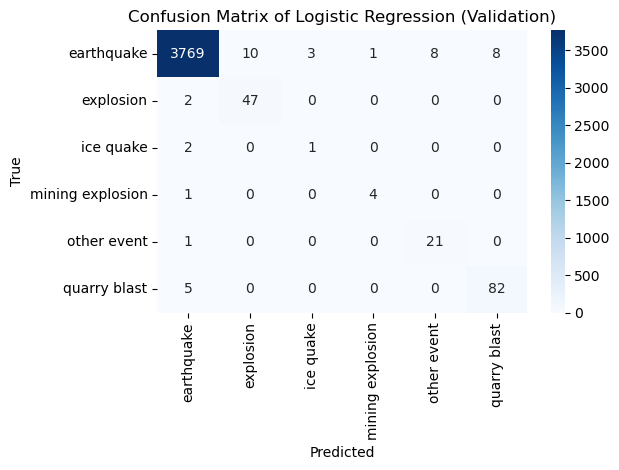

In [63]:
# validation subset best logistic regression confusion matrix
cm_val_logreg = confusion_matrix(y_val, y_val_pred_logreg, labels=classes)
plt.figure()
sns.heatmap(cm_val_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Logistic Regression (Validation)")
plt.tight_layout()
plt.show()


In [64]:
# training the best LogReg model on the 80% subset
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

best_logreg.fit(X_train_val, y_train_val)

y_test_pred_logreg = best_logreg.predict(X_test)
test_acc_logreg = accuracy_score(y_test, y_test_pred_logreg)
test_wt_f1_logreg = f1_score(y_test, y_test_pred_logreg, average="weighted")
test_macro_f1_logreg = f1_score(y_test, y_test_pred_logreg, average="macro")

print("\nlogistic regression on test set")
print("Test Accuracy:", round(test_acc_logreg, 6))
print("Test avg Weighted F1:", round(test_wt_f1_logreg, 6))
print("Test avg macro F1:", round(test_macro_f1_logreg, 6))
print("\ntest classification report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_logreg, digits=6))


C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\agno3\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



logistic regression on test set
Test Accuracy: 0.990921
Test avg Weighted F1: 0.992214
Test avg macro F1: 0.791354

test classification report (Logistic Regression):
                  precision    recall  f1-score   support

      earthquake   0.999735  0.991840  0.995772      3799
       explosion   0.888889  0.960000  0.923077        50
       ice quake   0.083333  0.500000  0.142857         2
mining explosion   1.000000  0.800000  0.888889         5
     other event   0.758621  1.000000  0.862745        22
    quarry blast   0.886598  0.988506  0.934783        87

        accuracy                       0.990921      3965
       macro avg   0.769529  0.873391  0.791354      3965
    weighted avg   0.994055  0.990921  0.992214      3965



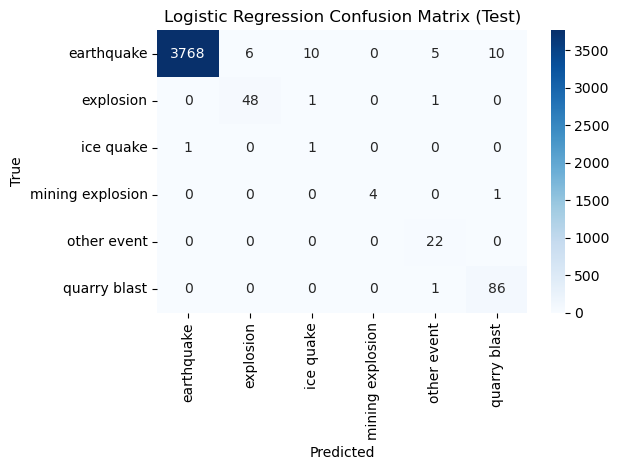

In [65]:
# logistict regression confusion matrix on test set
cm_test_logreg = confusion_matrix(y_test, y_test_pred_logreg, labels=classes)
plt.figure()
sns.heatmap(cm_test_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix (Test)")
plt.tight_layout()
plt.show()

# 5. SVM

In [66]:
# The SVM was was applied to test any nonlinear relationship of seismic data patterns
svm_pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC(class_weight="balanced"))])

svm_param_grid = {"svm__C": [0.1, 1, 10, 50, 100], "svm__gamma": ["scale", "auto", 0.01, 0.001], "svm__kernel": ["linear", "rbf"]}


svm_gs = GridSearchCV(estimator=svm_pipeline, param_grid=svm_param_grid, scoring="f1_weighted",cv=3)

In [67]:

svm_gs.fit(X_train, y_train)

print("\nbest SVM model:", svm_gs.best_params_)
best_svm = svm_gs.best_estimator_



best SVM model: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


In [68]:

y_val_pred_svm = best_svm.predict(X_val)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
val_wt_f1_svm  = f1_score(y_val, y_val_pred_svm, average="weighted")
val_macro_f1_svm  = f1_score(y_val, y_val_pred_svm, average="macro")

print("\nSVM validation scores")
print("validation accuracy:", round(val_acc_svm, 6))
print("Validation Weighted F1:", round(val_wt_f1_svm, 6))
print("Validation Weighted F1:", round(val_macro_f1_svm, 6))
print("\nvalidation data classification report (SVM):")
print(classification_report(y_val, y_val_pred_svm))


SVM validation scores
validation accuracy: 0.994704
Validation Weighted F1: 0.994666
Validation Weighted F1: 0.842321

validation data classification report (SVM):
                  precision    recall  f1-score   support

      earthquake       1.00      1.00      1.00      3799
       explosion       0.98      0.88      0.92        49
       ice quake       0.33      0.33      0.33         3
mining explosion       1.00      0.80      0.89         5
     other event       0.95      0.95      0.95        22
    quarry blast       0.93      0.98      0.96        87

        accuracy                           0.99      3965
       macro avg       0.87      0.82      0.84      3965
    weighted avg       0.99      0.99      0.99      3965



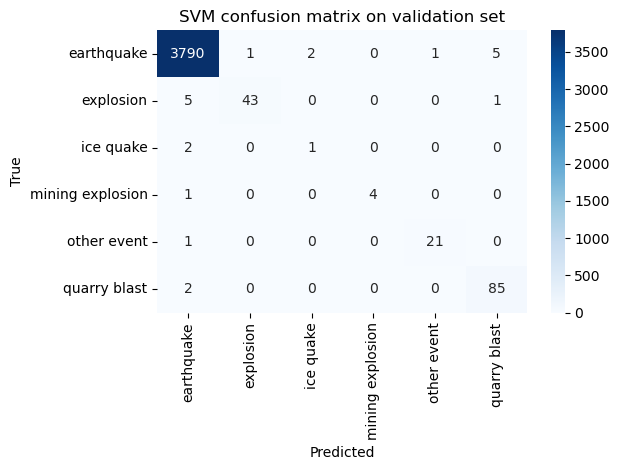

In [69]:

# Confusion matrix on validation
cm_val_svm = confusion_matrix(y_val, y_val_pred_svm, labels=classes)
plt.figure()
sns.heatmap( cm_val_svm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM confusion matrix on validation set")
plt.tight_layout()
plt.show()


In [70]:
# retrain the best svm model on 80% of the data

X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

best_svm.fit(X_train_val, y_train_val)


# evalaute the final model score on testing dataset
y_test_pred_svm = best_svm.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
test_wt_f1_svm  = f1_score(y_test, y_test_pred_svm, average="weighted")
test_mac_f1_svm  = f1_score(y_test, y_test_pred_svm, average="macro")

print("\nSVM test set")
print("test accuracy:", round(test_acc_svm, 6))
print("test weighted F1:", round(test_wt_f1_svm, 6))
print("test macro F1:", round(test_mac_f1_svm, 6))
print("\ntest classification report for SVM:")
print(classification_report(y_test, y_test_pred_svm, digits =6))



SVM test set
test accuracy: 0.993947
test weighted F1: 0.994057
test macro F1: 0.85206

test classification report for SVM:
                  precision    recall  f1-score   support

      earthquake   0.998679  0.995262  0.996968      3799
       explosion   0.959184  0.940000  0.949495        50
       ice quake   0.500000  0.500000  0.500000         2
mining explosion   0.800000  0.800000  0.800000         5
     other event   0.880000  1.000000  0.936170        22
    quarry blast   0.877551  0.988506  0.929730        87

        accuracy                       0.993947      3965
       macro avg   0.835902  0.870628  0.852060      3965
    weighted avg   0.994363  0.993947  0.994057      3965



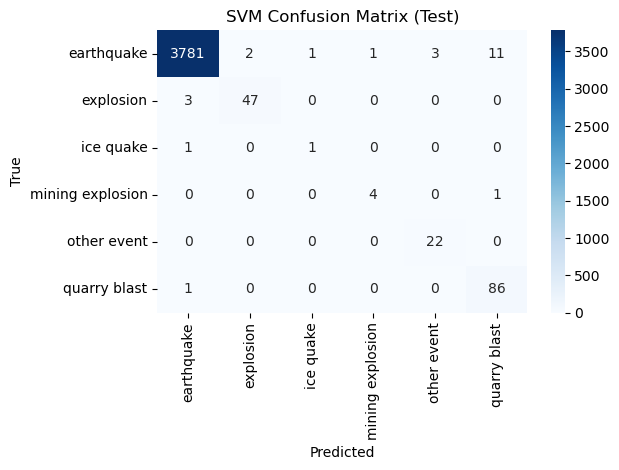

In [71]:
# test set SVM conf matrix
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm, labels=classes)
plt.figure()
sns.heatmap(cm_test_svm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix (Test)")
plt.tight_layout()
plt.show()


# 6. Random Forest

### To best handle the class imbalance here we computed classes weight

In [72]:

classes = np.unique(y_train)
class_weights_array = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights_array))
print("Class weights:", class_weight_dict)

Class weights: {'earthquake': 0.17394992394992395, 'explosion': 13.304250559284116, 'ice quake': 283.1904761904762, 'mining explosion': 132.15555555555557, 'other event': 30.497435897435896, 'quarry blast': 7.566157760814249}


In [73]:

# building a random forest classifier
    # random_state to have a fixed random state, to ensure reproducibility of results
    # n_jobs=-1 ensures using all available CPU cores
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight=class_weight_dict)

rf_pipe = Pipeline([("scaler", StandardScaler()), ("rf", rf)])
# Random forest hyperparameters grid:
    # n_estimators: 200–400 trees to optimise prediction stability and training time.
    # criterion to ["gini", "entropy"] to compare the best splitting quality for imbalanced multiclass targets.
    # max_depth: [None, 10, 20] to compare fully grown trees (None) against shallower trees.
    # min_samples_split: [2, 5] to control how many samples are needed to create a split, reducing overfitting on very small nodes.
    # min_impurity_decrease: [0.0, 0.001, 0.01] to prevent weak splits by requiring a minimum reduction in impurity

rf_param_grid = {"rf__n_estimators": [200, 400, 600], "rf__criterion": ["gini", "entropy"], "rf__max_depth": [None, 2, 5, 10, 20], "rf__min_samples_split": [2, 5, 7], 
                 "rf__min_impurity_decrease": [0.0, 0.001]}

In [74]:
# building grid search based on f1-weighted as every class contributes proportionally to the final score, which reduces the effect of  dominant sample (earthquake) and give more weight to under represented data
# this is critical for us as we care for all classes
rf_gs = GridSearchCV( estimator=rf_pipe, param_grid=rf_param_grid, scoring="f1_weighted", cv=3, n_jobs=-1)
#rf_gs = GridSearchCV( estimator=rf, param_grid=rf_param_grid, scoring="f1_weighted", cv=3, n_jobs=-1)


# fit the model using the grid
rf_gs.fit(X_train, y_train)

print("\nBest RF params:", rf_gs.best_params_)
best_rf = rf_gs.best_estimator_



Best RF params: {'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__min_impurity_decrease': 0.0, 'rf__min_samples_split': 7, 'rf__n_estimators': 400}


In [75]:
# Validate the performance best RF model by running predition on validation subset

y_val_pred_rf = best_rf.predict(X_val)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf, average="weighted")

print("\nRandom Forest – Validation Set")
print("\nValidation Accuracy:", round(val_acc_rf, 6))
print("\nValidation Weighted F1:", round(val_f1_rf, 6))
print("\nValidation Classification Report (RF):")
print(classification_report(y_val, y_val_pred_rf, digits=6))



Random Forest – Validation Set

Validation Accuracy: 0.996469

Validation Weighted F1: 0.996268

Validation Classification Report (RF):
                  precision    recall  f1-score   support

      earthquake   0.996328  1.000000  0.998161      3799
       explosion   1.000000  0.877551  0.934783        49
       ice quake   1.000000  0.333333  0.500000         3
mining explosion   1.000000  0.800000  0.888889         5
     other event   1.000000  0.954545  0.976744        22
    quarry blast   1.000000  0.954023  0.976471        87

        accuracy                       0.996469      3965
       macro avg   0.999388  0.819909  0.879175      3965
    weighted avg   0.996482  0.996469  0.996268      3965



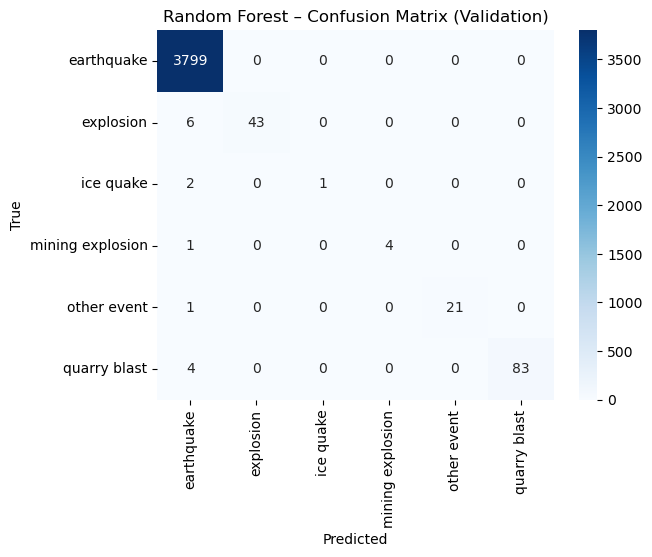

In [76]:
# drawing confusion matrix of validation set
cm_val_rf = confusion_matrix(y_val, y_val_pred_rf, labels=classes)
plt.figure()
sns.heatmap(cm_val_rf, annot=True, fmt="d", cmap="Blues", xticklabels=classes,yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest – Confusion Matrix (Validation)")
plt.show()


In [77]:
# Retrain on the Train + validation subsets together

X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)


best_rf.fit(X_train_val, y_train_val)


# hard voting evaluation of random forest
y_test_pred_rf = best_rf.predict(X_test)
test_acc_rf= accuracy_score(y_test, y_test_pred_rf)
test_f1_rf= f1_score(y_test, y_test_pred_rf, average= "weighted")

print("\nHard voting random forest on Test Set")
print("\nTest Accuracy:", round(test_acc_rf, 6))
print("\nTest Weighted F1:", round(test_f1_rf, 6))
print("\nTest Classification Report (RF):")
print(classification_report(y_test, y_test_pred_rf, digits=6))



Hard voting random forest on Test Set

Test Accuracy: 0.998739

Test Weighted F1: 0.998677

Test Classification Report (RF):
                  precision    recall  f1-score   support

      earthquake   0.998686  1.000000  0.999342      3799
       explosion   1.000000  0.960000  0.979592        50
       ice quake   1.000000  0.500000  0.666667         2
mining explosion   1.000000  0.800000  0.888889         5
     other event   1.000000  1.000000  1.000000        22
    quarry blast   1.000000  0.988506  0.994220        87

        accuracy                       0.998739      3965
       macro avg   0.999781  0.874751  0.921452      3965
    weighted avg   0.998741  0.998739  0.998677      3965



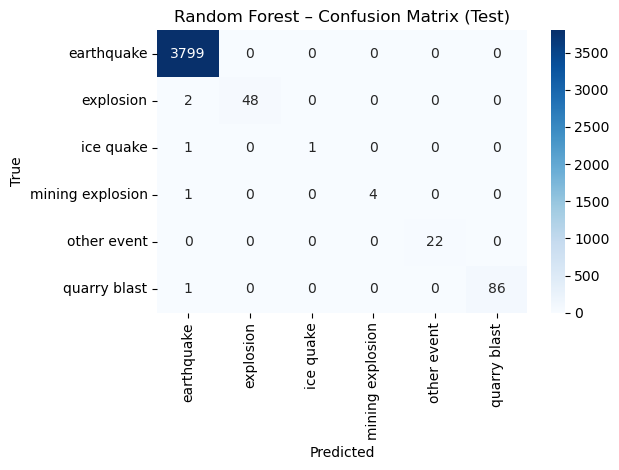

In [78]:
# Testing subset confusion matrix
cm_test_rf = confusion_matrix(y_test, y_test_pred_rf, labels=classes)
plt.figure()
sns.heatmap(cm_test_rf, annot=True, fmt="d", cmap="Blues", xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest – Confusion Matrix (Test)')
plt.tight_layout()
plt.show()


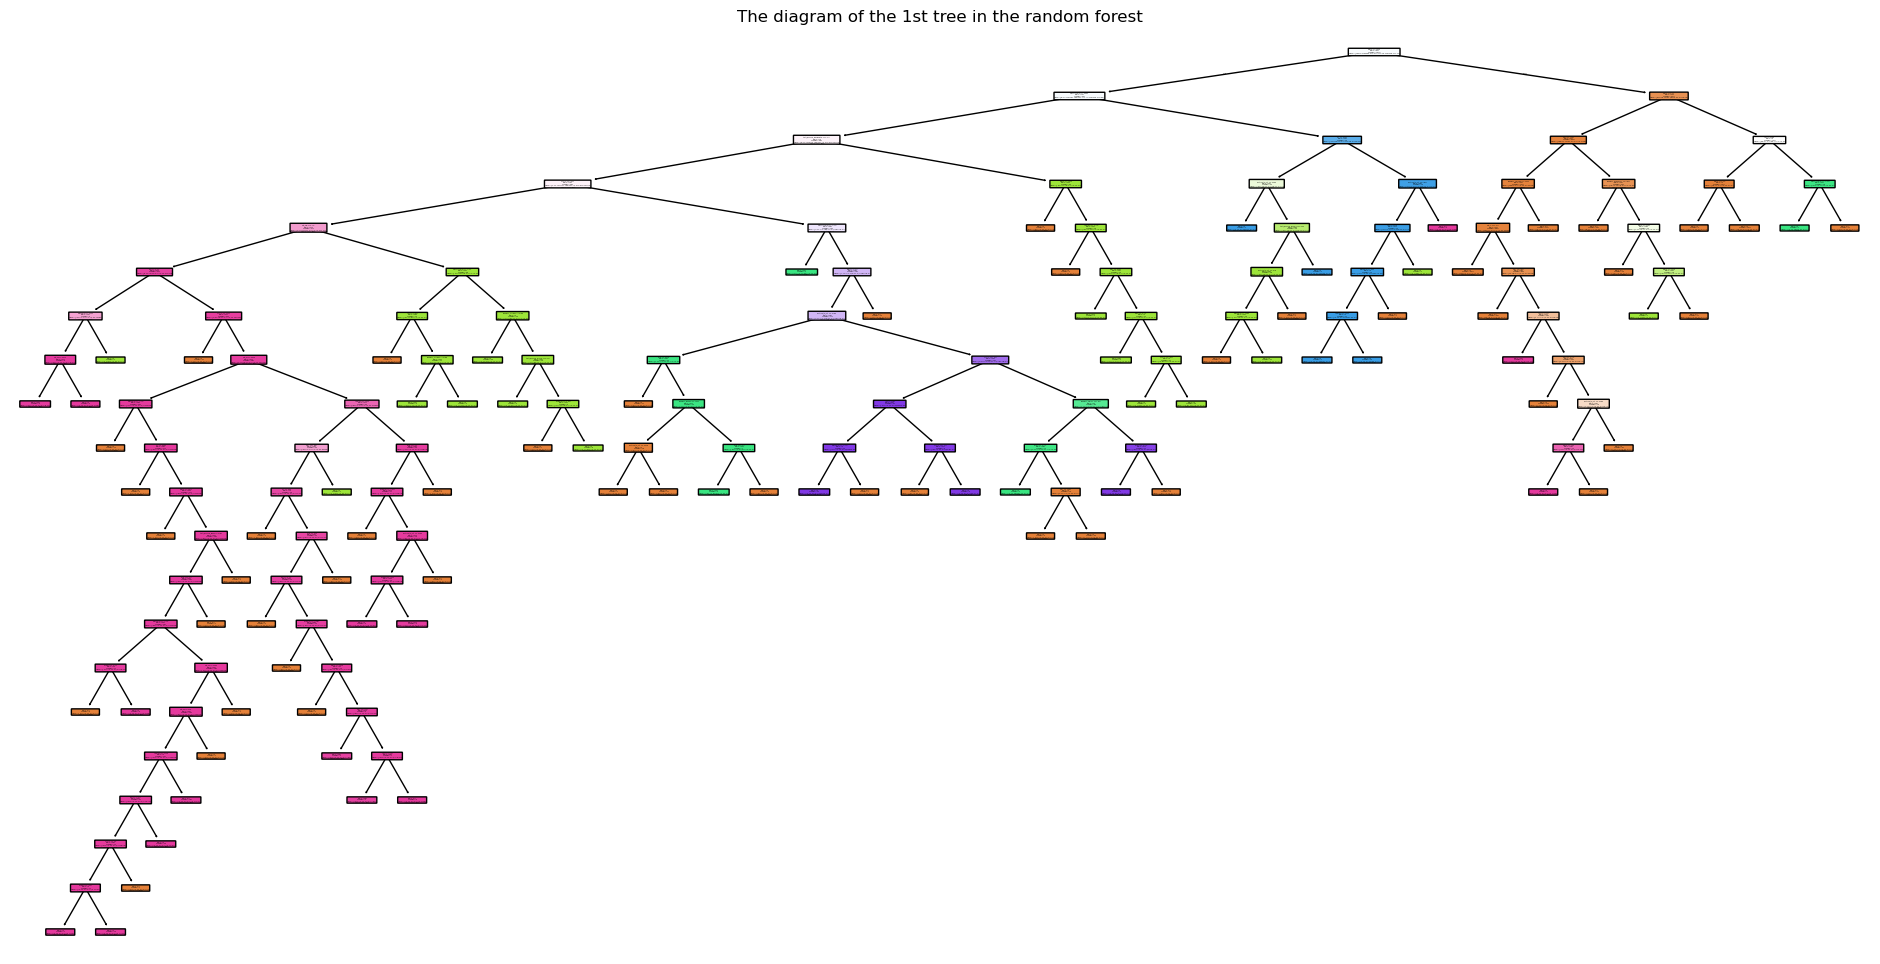

In [79]:
# plotting the RF tree


from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

# 


rf_model = best_rf.named_steps["rf"]

final_tree = rf_model.estimators_[0]

# 3. Plot the tree (top levels only for readability)
plt.figure(figsize=(24, 12))
plot_tree(final_tree, feature_names=X_test.columns, class_names=best_rf.classes_.astype(str), filled=True, rounded=True)
plt.title("The diagram of the 1st tree in the random forest")
plt.show()




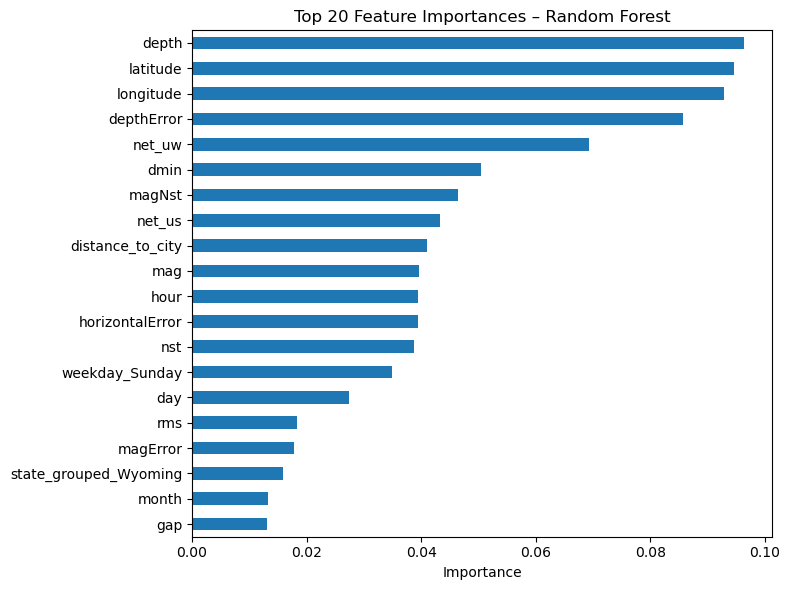

In [80]:
# Extraction of feature importance (top 20)


importances_rf = rf_model.feature_importances_
fi_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
fi_rf[::-1].plot(kind='barh')
plt.title('Top 20 Feature Importances – Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


# Final comparison & reporting

In [81]:
# List of models
model_names = ["KNN", "Radius NN", "LDA", "Logistic Regression", "SVM", "Random Forest"]


models = [best_knn, best_radius_nn, best_lda, best_logreg, best_svm, best_rf]


# predictions list
y_preds = [y_test_pred_knn, y_test_pred_rnn, y_test_pred_lda,
           y_test_pred_logreg, y_test_pred_svm, y_test_pred_rf]



In [82]:

# list of dictionaries where each dictionary is scores of model

df_rows = []

for i in range(len(model_names)):
    name = model_names[i]
    y_pred = y_preds[i]
    
    df_rows.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 6),
        "Avg Precision (weighted)": round(precision_score(y_test, y_pred, average="weighted", zero_division=0), 6),
        "Avg Recall (weighted)": round(recall_score(y_test, y_pred, average="weighted", zero_division=0), 6),
        "Avg F1-score (weighted)": round(f1_score(y_test, y_pred, average="weighted", zero_division=0), 6),
        "Avg Precision (macro)": round(precision_score(y_test, y_pred, average="macro", zero_division=0), 6),
        "Avg Recall (macro)": round(recall_score(y_test, y_pred, average="macro", zero_division=0), 6),
        "Avg F1-score (macro)": round(f1_score(y_test, y_pred, average="macro", zero_division=0), 6)
    })

# Convert to a pandas dataframe for easy reporting
results_df = pd.DataFrame(df_rows).set_index("Model")

results_df

Accuracy  Avg Precision (weighted)  \
Model                                                     
KNN                  0.993443                  0.992939   
Radius NN            0.987642                  0.987074   
LDA                  0.941488                  0.959231   
Logistic Regression  0.990921                  0.994055   
SVM                  0.993947                  0.994363   
Random Forest        0.998739                  0.998741   

                     Avg Recall (weighted)  Avg F1-score (weighted)  \
Model                                                                 
KNN                               0.993443                 0.993170   
Radius NN                         0.987642                 0.986322   
LDA                               0.941488                 0.948729   
Logistic Regression               0.990921                 0.992214   
SVM                               0.993947                 0.994057   
Random Forest                     0.998739                 0.998677   

                     Avg Precision (macro)  Avg Recall (macro)  \
Model                                                            
KNN                               0.771615            0.773694   
Radius NN                         0.808317            0.603338   
LDA                               0.458553            0.675093   
Logistic Regression               0.769529            0.873391   
SVM                               0.835902            0.870628   
Random Forest                     0.999781            0.874751   

                     Avg F1-score (macro)  
Model                                      
KNN                              0.772439  
Radius NN                        0.653212  
LDA                              0.515333  
Logistic Regression              0.791354  
SVM                              0.852060  
Random Forest                    0.921452

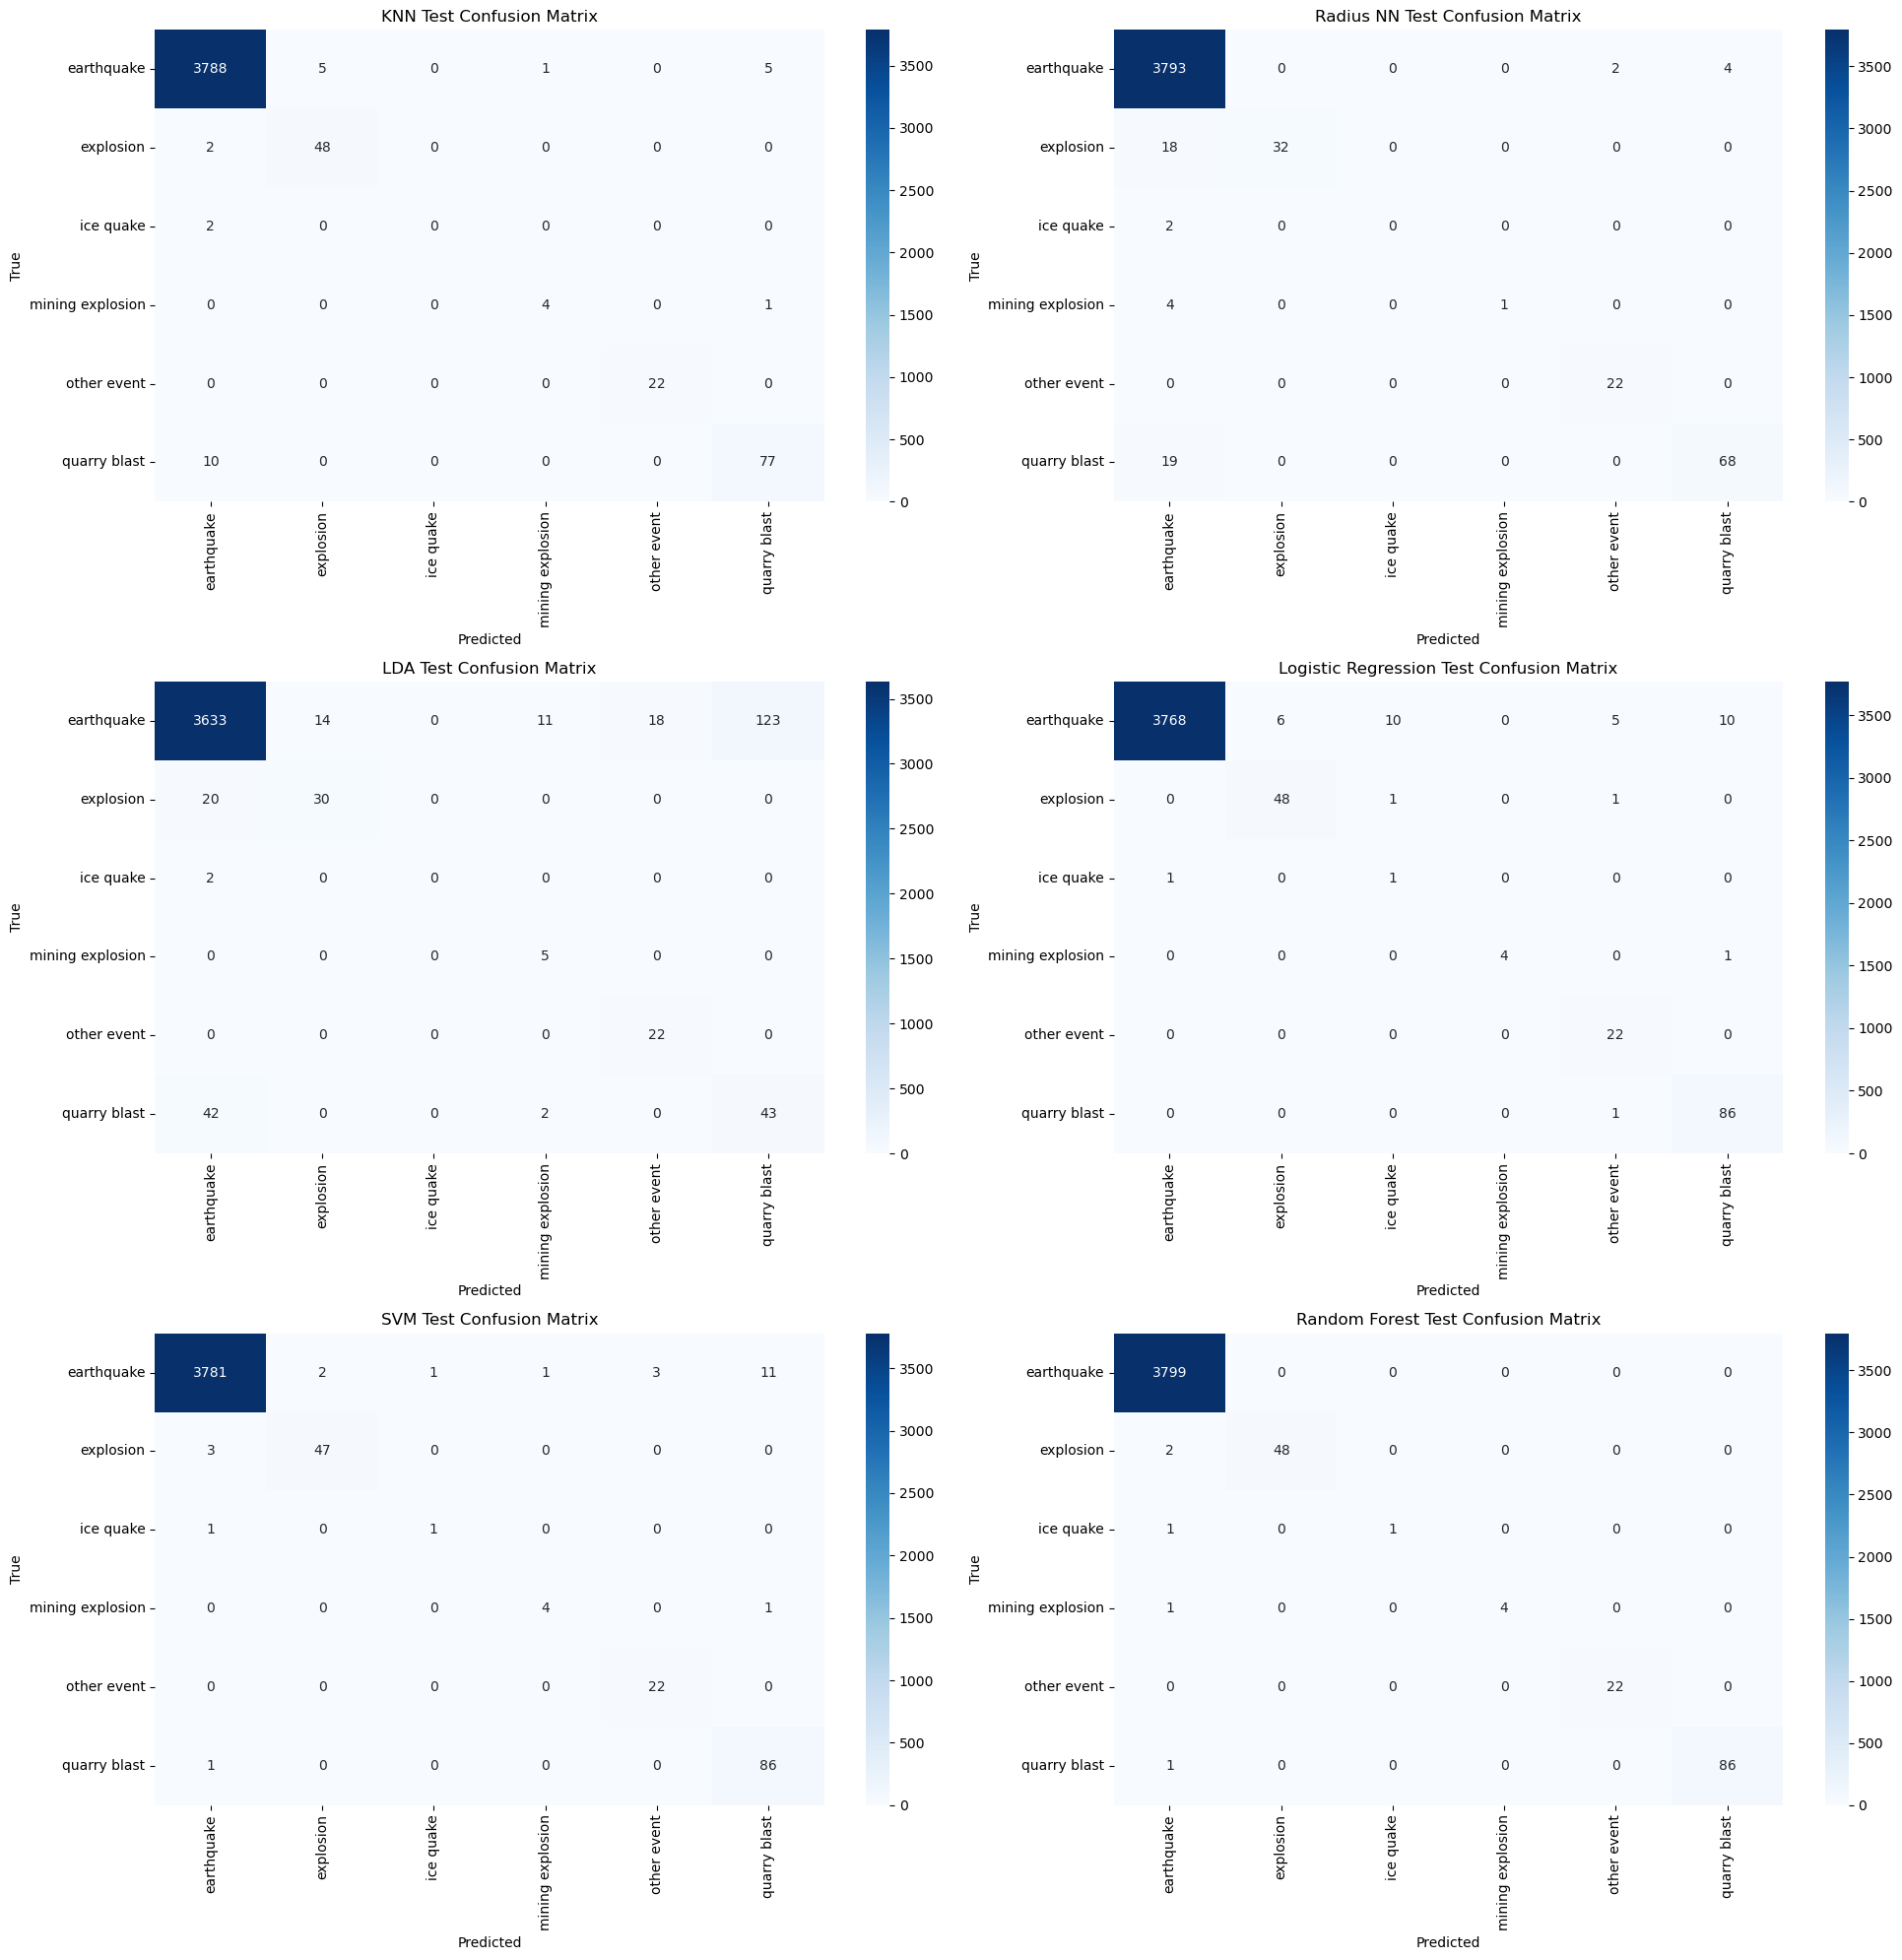

In [83]:
plt.figure(figsize=(20, 20))

n_rows = 3
n_cols = 2

for i in range(len(model_names)):
    plt.subplot(n_rows, n_cols, i + 1)

    # Compute confusion matrix for each model
    conf_mat_mod = confusion_matrix(y_test, y_preds[i], labels=classes)
    sns.heatmap(conf_mat_mod, annot=True, fmt="d", cmap="Blues",xticklabels=classes, yticklabels=classes)
    plt.title(f"{model_names[i]} Test Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()
